In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 50)

In [29]:
import sys
sys.path.append('../lending_club')
from data_prep import clean, refine_features

In [2]:
accepted_2014 = pd.read_parquet('../data/accepted-2014.parquet', engine='fastparquet')
accepted_2014.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Year
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
69342,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,Cash,N,None,None,None,NaN,NaN,NaN,2014
69343,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,...,NaN,Cash,N,None,None,None,NaN,NaN,NaN,2014
69344,37822187,NaN,9600.0,9600.0,9600.0,36 months,13.66,326.53,C,C3,...,NaN,Cash,N,None,None,None,NaN,NaN,NaN,2014
69345,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,Cash,N,None,None,None,NaN,NaN,NaN,2014
69346,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,...,NaN,Cash,N,None,None,None,NaN,NaN,NaN,2014


In [14]:
df=pd.DataFrame(accepted_2014, index=None)

In [20]:
df.reset_index(inplace=True)

In [23]:
df['__null_dask_index__']

0         69342
1         69343
2         69344
3         69345
4         69346
          ...  
235624    34723
235625    34724
235626    34725
235627    34726
235628    34727
Name: __null_dask_index__, Length: 235629, dtype: int64

In [24]:
df.drop(['__null_dask_index__'], axis=1, inplace=True)

In [27]:
df.set_index(['id'], inplace=True)

In [28]:
df.sample(10).issue_d

id
14639053   2014-04-01
35054934   2014-12-01
35451153   2014-11-01
12755640   2014-03-01
28682648   2014-10-01
12448938   2014-03-01
31186303   2014-11-01
11446615   2014-02-01
20368737   2014-07-01
26359508   2014-09-01
Name: issue_d, dtype: datetime64[ns]

In [3]:
# accepted_2014.to_csv('../data/2014.csv')

In [6]:
accepted_2014.shape

(235629, 152)

In [ ]:
columns = list(accepted_2014.columns)
columns

In [27]:
df = accepted_2014[['loan_status','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl',
                    'mort_acc','mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog',
                    'mths_since_rcnt_il','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq',
                    'mths_since_recent_revol_delinq','next_pymnt_d', 'num_accts_ever_120_pd','num_actv_bc_tl',
                    'num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts',
                    'num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m',
                    'num_tl_op_past_12m','open_acc',]]

In [28]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235629 entries, 69342 to 34727
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_status                     235629 non-null  object 
 1   mo_sin_old_il_acct              228458 non-null  float64
 2   mo_sin_old_rev_tl_op            235629 non-null  float64
 3   mo_sin_rcnt_rev_tl_op           235629 non-null  float64
 4   mo_sin_rcnt_tl                  235629 non-null  float64
 5   mort_acc                        235629 non-null  float64
 6   mths_since_last_delinq          119748 non-null  float64
 7   mths_since_last_record          41524 non-null   float64
 8   mths_since_last_major_derog     66478 non-null   float64
 9   mths_since_rcnt_il              0 non-null       float64
 10  mths_since_recent_bc            233383 non-null  float64
 11  mths_since_recent_bc_dlq        62281 non-null   float64
 12  mths_since_re

mths_since_recent_bc                2246
mo_sin_old_il_acct                  7171
num_tl_120dpd_2m                    7860
mths_since_recent_inq              21692
mths_since_last_delinq            115881
mths_since_recent_revol_delinq    150863
mths_since_last_major_derog       169151
mths_since_recent_bc_dlq          173348
mths_since_last_record            194105
next_pymnt_d                      223102
mths_since_rcnt_il                235629
dtype: int64

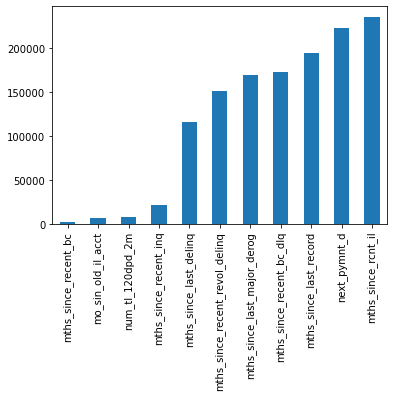

In [29]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
missing

In [30]:
missing_list = [i for i in missing.index]
df[missing_list].describe()

,mths_since_recent_bc,mo_sin_old_il_acct,num_tl_120dpd_2m,mths_since_recent_inq,mths_since_last_delinq,mths_since_recent_revol_delinq,mths_since_last_major_derog,mths_since_recent_bc_dlq,mths_since_last_record,mths_since_rcnt_il
count,233383.000000,228458.000000,227769.000000,213937.000000,119748.000000,84766.000000,66478.000000,62281.000000,41524.000000,0.0
mean,24.444917,128.533293,0.000966,6.920481,33.398019,35.458580,42.407879,39.630915,70.711444,NaN
std,30.295965,51.279966,0.032038,5.931004,21.779818,22.298694,20.886556,22.573247,28.463384,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,6.000000,101.000000,0.000000,2.000000,15.000000,16.000000,25.000000,20.000000,50.000000,NaN
50%,14.000000,131.000000,0.000000,5.000000,30.000000,32.000000,43.000000,39.000000,69.000000,NaN
75%,30.000000,154.000000,0.000000,10.000000,49.000000,52.000000,59.000000,58.000000,97.000000,NaN
max,616.000000,561.000000,2.000000,25.000000,188.000000,180.000000,188.000000,170.000000,121.000000,NaN


### Imputation

In [9]:
#impute with mean
df['mths_since_recent_bc'].fillna(np.mean(df.mths_since_recent_bc),inplace=True)
df['mo_sin_old_il_acct'].fillna(np.mean(df.mo_sin_old_il_acct), inplace=True)
df['mths_since_recent_inq'].fillna(np.mean(df.mths_since_recent_inq), inplace=True)

#impute with o
df['num_tl_120dpd_2m'].fillna(0, inplace=True)

### Drop columns

In [ ]:
df.drop(['mths_since_last_delinq','mths_since_last_major_derog','mths_since_recent_bc_dlq',
         'mths_since_last_record','mths_since_rcnt_il'], axis=1, inplace=True)

In [48]:
df1 = df.loc[df['mths_since_last_delinq'].isnull()]
df1.loan_status.value_counts()

Fully Paid            89907
Charged Off           19739
Current                5940
Late (31-120 days)      164
In Grace Period          92
Late (16-30 days)        39
Name: loan_status, dtype: int64

In [37]:
df.mths_since_recent_inq.value_counts()

1.0     23548
0.0     19344
2.0     19074
3.0     17057
4.0     15556
        ...  
21.0     2352
22.0     2109
23.0     1924
24.0      916
25.0        7
Name: mths_since_recent_inq, Length: 26, dtype: int64

In [32]:
df.mo_sin_old_il_acct.value_counts()

132.0    2912
127.0    2822
131.0    2803
128.0    2802
133.0    2798
         ... 
476.0       1
433.0       1
439.0       1
412.0       1
468.0       1
Name: mo_sin_old_il_acct, Length: 453, dtype: int64

In [31]:
df.num_tl_120dpd_2m.value_counts()

0.0    227556
1.0       206
2.0         7
Name: num_tl_120dpd_2m, dtype: int64

In [49]:
df.mo_sin_rcnt_tl.value_counts()

2.0      25517
3.0      24896
4.0      21939
1.0      20106
5.0      19066
         ...  
133.0        1
145.0        1
140.0        1
141.0        1
155.0        1
Name: mo_sin_rcnt_tl, Length: 132, dtype: int64

In [51]:
df.mort_acc.isnull().sum()

0

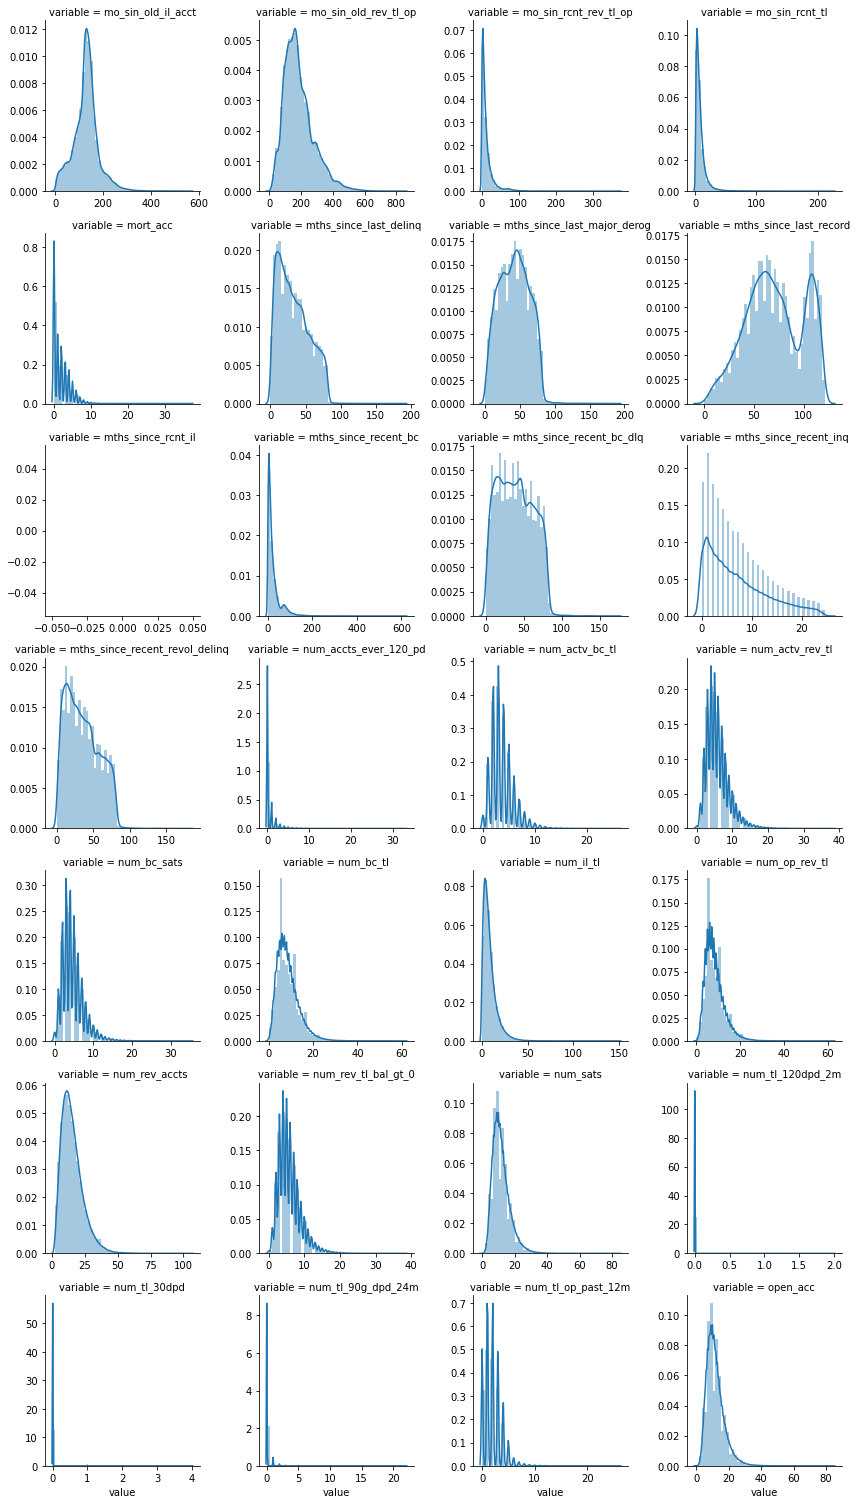

In [28]:
num_features = df.select_dtypes(include=['float64']).columns
f = pd.melt(df, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [56]:
# df.loan_status.hist()
total = df.shape[0]
pct=[]
for i in df.loan_status.value_counts():
    pct.append(i/df.shape[0])
pd.Series(pct, index(['Fully Paid'])

NameError: name 'index' is not defined

In [52]:
df.loan_status.value_counts()

Fully Paid            181941
Charged Off            41161
Current                11919
Late (31-120 days)       334
In Grace Period          200
Late (16-30 days)         73
Default                    1
Name: loan_status, dtype: int64

In [ ]:
cle